## Exercise 2.1

Solve the Bayesian inference problem step by step.

**Setup:**

- Prior: $X \sim \text{Uniform}(0,1)$, so $\pi(x) = 1$ for $x \in (0,1)$
- Likelihood: $Y|X \sim \text{Geometric}(X)$ with $P(Y=k|X=x) = x(1-x)^{k-1}$ for $k=1,2,3,...$
- Observation: $y=2$

**Solution:**

For $y=2$, the likelihood is:
$$P(Y=2|X=x) = (1-x)x$$

Using Bayes' theorem:
$$\pi(x|y=2) = \frac{P(y=2|x)\pi(x)}{P(y=2)}$$

The marginal likelihood is:
$$P(y=2) = \int_0^1 x(1-x) dx = \frac{1}{2} - \frac{1}{3} = \frac{1}{6}$$

Therefore, the **posterior density** is:
$$\pi(x|y=2) = \frac{x(1-x)}{1/6} = 6x(1-x)$$

This is a **Beta(2,2)** distribution.

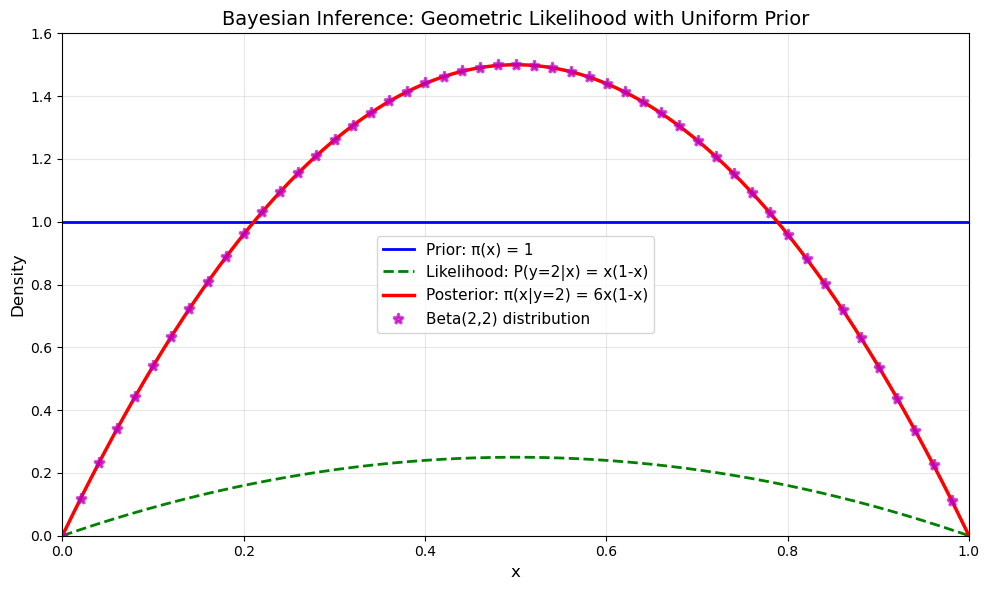

Posterior mean: 0.5000
Posterior mode: 0.4995
Posterior variance: 0.0500

Beta(2,2) mean: 0.5000
Beta(2,2) mode: 0.5000
Beta(2,2) variance: 0.0500


In [6]:
# Beta(2,2)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define x values
x = np.linspace(0, 1, 1000)

# Prior: Uniform(0,1)
prior = np.ones_like(x)

# Likelihood: P(Y=2|X=x) = x(1-x)
likelihood = x * (1 - x)

# Posterior: pi(x|y=2) = 6*x*(1-x)
posterior = 6 * x * (1 - x)

# Beta(2,2) distribution for comparison
beta_dist = beta(2, 2)
beta_pdf = beta_dist.pdf(x)

# Sparse points for Beta(2,2) - every 10th point
gap = 20
x_sparse = x[::gap]
beta_sparse = beta_pdf[::gap]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, prior, 'b-', linewidth=2, label='Prior: π(x) = 1')
plt.plot(x, likelihood, 'g--', linewidth=2, label='Likelihood: P(y=2|x) = x(1-x)')
plt.plot(x, posterior, 'r-', linewidth=2.5, label='Posterior: π(x|y=2) = 6x(1-x)')
#plt.plot(x, beta_pdf, 'm', linewidth=3, label='Beta(2,2) distribution', alpha=0.7)
plt.plot(x_sparse, beta_sparse, 'm*', markersize=8, markeredgewidth=2, label='Beta(2,2) distribution', alpha=0.7)

plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Bayesian Inference: Geometric Likelihood with Uniform Prior', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1.6)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Posterior mean: {np.trapezoid(x * posterior, x):.4f}")
print(f"Posterior mode: {x[np.argmax(posterior)]:.4f}")
print(f"Posterior variance: {np.trapezoid((x**2) * posterior, x) - np.trapezoid(x * posterior, x)**2:.4f}")
print(f"\nBeta(2,2) mean: {beta_dist.mean():.4f}")
print(f"Beta(2,2) mode: {(2-1)/(2+2-2):.4f}")
print(f"Beta(2,2) variance: {beta_dist.var():.4f}")

### Conlusions

The posterior is symmetric around $x=0.5$ and concentrates the probability mass toward the middle of the interval, reflecting the information gained from observing $y=2$.